<a href="https://colab.research.google.com/github/fbertran/m2csmi_s1/blob/master/cantilever_beam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openturns

     |████████████████████████████████| 33.7MB 1.3MB/s 


In [0]:
from openturns import *

# import optional OpenTURNS viewer module
from openturns.viewer import View

from math import sqrt

In [0]:
#######################
### Function 'deviation'
#######################
# Create here the python lines to define the implementation of the function

# In order to be able to use that function with the openturns library,
# it is necessary to define a class which derives from OpenTURNSPythonFunction

class modelePYTHON(OpenTURNSPythonFunction) :
  # that following method defines the input size (4) and the output size (1)
  def __init__(self) :
    OpenTURNSPythonFunction.__init__(self,4,1)

  # that following method gives the implementation of modelePYTHON
  def _exec(self,x) :
    E=x[0]
    F=x[1]
    L=x[2]
    I=x[3]
    return [(F*L*L*L)/(3.*E*I)]

# Use that function defined in the script python
# with the openturns library
# Create a Function from modelePYTHON
deviation = Function(modelePYTHON())

In [0]:
###########################################
### Input random vector
###########################################

# Create the marginal distriutions of the input random vector
distributionE = Beta(0.93, 3.2, 2.8e7, 4.8e7)
distributionF = LogNormalMuSigma(300.0, 90.0, 150.0).getDistribution()
distributionL = Uniform(250, 260)
distributionI = Beta(2.5, 4.0, 3.1e2, 4.5e2)

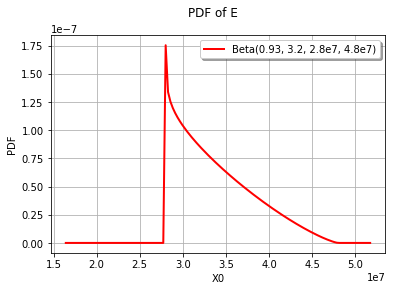

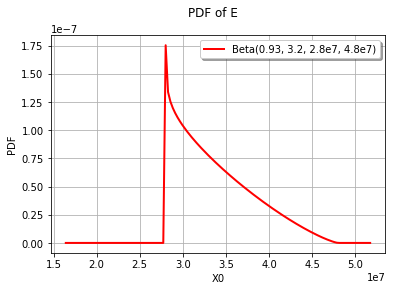

In [7]:
# Visualize the probability density functions

pdfLoiE = distributionE.drawPDF()
# Change the legend
draw_E = pdfLoiE.getDrawable(0)
draw_E.setLegend("Beta(0.93, 3.2, 2.8e7, 4.8e7)")
pdfLoiE.setDrawable(draw_E,0)
# Change the title
pdfLoiE.setTitle("PDF of E")

#pdfLoiE.draw("distributionE_pdf", 640, 480)
View(pdfLoiE).save('pdf_R.png')
View(pdfLoiE).show()

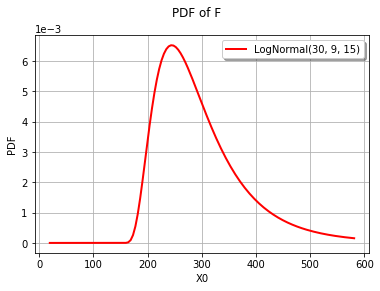

In [8]:
pdfLoiF = distributionF.drawPDF()
# Change the legend
draw_F = pdfLoiF.getDrawable(0)
draw_F.setLegend("LogNormal(300, 90, 150)")
pdfLoiF.setDrawable(draw_F,0)
# Change the title
pdfLoiF.setTitle("PDF of F")

#pdfLoiF.draw("distributionF_pdf", 640, 480)
View(pdfLoiF).show()

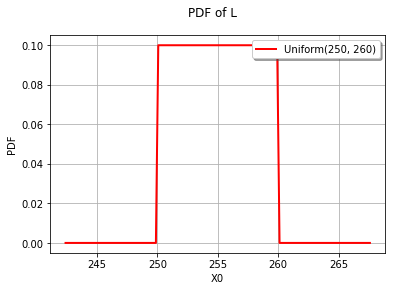

In [9]:
pdfLoiL = distributionL.drawPDF()
# Change the legend
draw_L = pdfLoiL.getDrawable(0)
draw_L.setLegend("Uniform(250, 260)")
pdfLoiL.setDrawable(draw_L,0)
# Change the title
pdfLoiL.setTitle("PDF of L")

#pdfLoiL.draw("distributionL_pdf", 640, 480)
View(pdfLoiL).show()


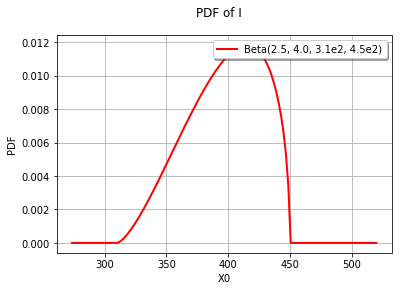

In [10]:
pdfLoiI = distributionI.drawPDF()
# Change the legend
draw_I = pdfLoiI.getDrawable(0)
draw_I.setLegend("Beta(2.5, 4.0, 3.1e2, 4.5e2)")
pdfLoiI.setDrawable(draw_I,0)
# Change the title
pdfLoiI.setTitle("PDF of I")

#pdfLoiI.draw("distributionI_pdf", 640, 480)
View(pdfLoiI).show()

In [12]:
# Create the Spearman correlation matrix of the input random vector
RS = CorrelationMatrix(4)
print( "RS = ", RS)
RS[2,3] = -0.2
print( "RS = ", RS)

print(RS)

print( "2,3 = ", RS[2,3])
print( "3,2 = ", RS[3,2])

('RS = ', class=CorrelationMatrix dimension=4 implementation=class=MatrixImplementation name=Unnamed rows=4 columns=4 values=[1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1])
('RS = ', class=CorrelationMatrix dimension=4 implementation=class=MatrixImplementation name=Unnamed rows=4 columns=4 values=[1,0,0,0,0,1,0,0,0,0,1,-0.2,0,0,-0.2,1])
[[  1    0    0    0   ]
 [  0    1    0    0   ]
 [  0    0    1   -0.2 ]
 [  0    0   -0.2  1   ]]
('2,3 = ', -0.2)
('3,2 = ', -0.2)


In [0]:
# Evaluate the correlation matrix of the Normal copula from RS
R = NormalCopula.GetCorrelationFromSpearmanCorrelation(RS)

# Create the Normal copula parametrized by R
copuleNormal = NormalCopula(R)

In [0]:
# Create a collection of the marginal distributions
collectionMarginals = [distributionE, distributionF, distributionL, distributionI]

# Create the input probability distribution of dimension 4
inputDistribution = ComposedDistribution(collectionMarginals, copuleNormal)

# Give a description of each component of the input distribution
inputDistribution.setDescription( ("E","F","L","I") )

# Create the input random vector
inputRandomVector = RandomVector(inputDistribution)
inputRandomVector.setDescription( ("E","F","L","I") )

In [0]:
# Create the output variable of interest
outputVariableOfInterest =  RandomVector(deviation, inputRandomVector)

In [0]:
####################################################
# Min/Max study with deterministic design of experiment
####################################################

print( "###################################################")
print( " Min/Max study with deterministic design of experiments ")
print( "###################################################")


dim = deviation.getInputDimension()

# Create the structure of the design of experiments : Composite type

# On each direction separately, several levels are evaluated
# here,  3 levels : +/-0.5, +/-1., +/-3. from the center
levelsNumber = 3
levels = Point(levelsNumber, 0.0)
levels[0] = 0.5
levels[1] = 1.0
levels[2] = 3.0
# Creation of the composite design of experiments
myDesign = Composite(dim, levels)

# Generation of points according to the structure of the design of experiments
# (in a reduced centered space)
inputSample = myDesign.generate()
print(myDesign.generate())

###################################################
 Min/Max study with deterministic design of experiments 
###################################################
 0 : [  0    0    0    0   ]
 1 : [ -0.5 -0.5 -0.5 -0.5 ]
 2 : [  0.5 -0.5 -0.5 -0.5 ]
 3 : [ -0.5  0.5 -0.5 -0.5 ]
 4 : [  0.5  0.5 -0.5 -0.5 ]
 5 : [ -0.5 -0.5  0.5 -0.5 ]
 6 : [  0.5 -0.5  0.5 -0.5 ]
 7 : [ -0.5  0.5  0.5 -0.5 ]
 8 : [  0.5  0.5  0.5 -0.5 ]
 9 : [ -0.5 -0.5 -0.5  0.5 ]
10 : [  0.5 -0.5 -0.5  0.5 ]
11 : [ -0.5  0.5 -0.5  0.5 ]
12 : [  0.5  0.5 -0.5  0.5 ]
13 : [ -0.5 -0.5  0.5  0.5 ]
14 : [  0.5 -0.5  0.5  0.5 ]
15 : [ -0.5  0.5  0.5  0.5 ]
16 : [  0.5  0.5  0.5  0.5 ]
17 : [ -1   -1   -1   -1   ]
18 : [  1   -1   -1   -1   ]
19 : [ -1    1   -1   -1   ]
20 : [  1    1   -1   -1   ]
21 : [ -1   -1    1   -1   ]
22 : [  1   -1    1   -1   ]
23 : [ -1    1    1   -1   ]
24 : [  1    1    1   -1   ]
25 : [ -1   -1   -1    1   ]
26 : [  1   -1   -1    1   ]
27 : [ -1    1   -1    1   ]
28 : [  1    1   -1    1   

In [0]:
# Scaling of the structure of the design of experiments
# scaling vector for each dimension of the levels of the structure
# to take into account the dimension of each component
# for example : the standard deviation of each component of 'inputRandomVector'
# in case of a RandomVector
scaling = Point(dim)
scaling[0] = sqrt(inputRandomVector.getCovariance()[0,0])
scaling[1] = sqrt(inputRandomVector.getCovariance()[1,1])
scaling[2] = sqrt(inputRandomVector.getCovariance()[2,2])
scaling[3] = sqrt(inputRandomVector.getCovariance()[3,3])

print(scaling)
inputSample *= scaling
print(inputSample)

[4.43108e+06,9,2.88675,30.3109]
 0 : [   0             0             0             0           ]
 1 : [  -2.21554e+06  -4.5          -1.44338     -15.1554      ]
 2 : [   2.21554e+06  -4.5          -1.44338     -15.1554      ]
 3 : [  -2.21554e+06   4.5          -1.44338     -15.1554      ]
 4 : [   2.21554e+06   4.5          -1.44338     -15.1554      ]
 5 : [  -2.21554e+06  -4.5           1.44338     -15.1554      ]
 6 : [   2.21554e+06  -4.5           1.44338     -15.1554      ]
 7 : [  -2.21554e+06   4.5           1.44338     -15.1554      ]
 8 : [   2.21554e+06   4.5           1.44338     -15.1554      ]
 9 : [  -2.21554e+06  -4.5          -1.44338      15.1554      ]
10 : [   2.21554e+06  -4.5          -1.44338      15.1554      ]
11 : [  -2.21554e+06   4.5          -1.44338      15.1554      ]
12 : [   2.21554e+06   4.5          -1.44338      15.1554      ]
13 : [  -2.21554e+06  -4.5           1.44338      15.1554      ]
14 : [   2.21554e+06  -4.5           1.44338      15.1554 

In [0]:
# Translation of the nonReducedSample onto the center of the design of experiments
# center = mean point of the inputRandomVector distribution
center = inputRandomVector.getMean()
inputSample += center

print(inputSample)

 0 : [   3.38125e+07  30           255           397.5         ]
 1 : [   3.1597e+07   25.5         253.557       382.345       ]
 2 : [   3.6028e+07   25.5         253.557       382.345       ]
 3 : [   3.1597e+07   34.5         253.557       382.345       ]
 4 : [   3.6028e+07   34.5         253.557       382.345       ]
 5 : [   3.1597e+07   25.5         256.443       382.345       ]
 6 : [   3.6028e+07   25.5         256.443       382.345       ]
 7 : [   3.1597e+07   34.5         256.443       382.345       ]
 8 : [   3.6028e+07   34.5         256.443       382.345       ]
 9 : [   3.1597e+07   25.5         253.557       412.655       ]
10 : [   3.6028e+07   25.5         253.557       412.655       ]
11 : [   3.1597e+07   34.5         253.557       412.655       ]
12 : [   3.6028e+07   34.5         253.557       412.655       ]
13 : [   3.1597e+07   25.5         256.443       412.655       ]
14 : [   3.6028e+07   25.5         256.443       412.655       ]
15 : [   3.1597e+07   34.

In [0]:
# Get the number of points in the design of experiments
pointNumber = inputSample.getSize()

# Evaluate the ouput variable of interest on the design of experiments
outputSample = deviation(inputSample)

# Evaluate the range of the output variable of interest on that design of experiments
minValue = outputSample.getMin()
maxValue = outputSample.getMax()

print( "From a composite design of experiments of size = ", pointNumber)
print( "Levels = ", levels[0], ", ", levels[1], ", ", levels[2])
print( "Min Value = ", minValue[0])
print( "Max Value = ", maxValue[0])
print( "")

('From a composite design of experiments of size = ', 73)
('Levels = ', 0.5, ', ', 1.0, ', ', 3.0)
('Min Value = ', 0.0006497179753649715)
('Max Value = ', 0.05536051851305121)



In [0]:
###########################################################
# Min/Max study by random sampling
###########################################################

print ("#################################")
print (" Min/Max study by random sampling")
print ("#################################")

pointNumber = 10000
print( "From random sampling = ", pointNumber)
outputSample2 = outputVariableOfInterest.getSample(pointNumber)

minValue2 = outputSample2.getMin()
maxValue2 = outputSample2.getMax()

print( "Min Value = ", minValue2[0])
print( "Max Value = ", maxValue2[0])
print( "")


#################################
 Min/Max study by random sampling
#################################
('From random sampling = ', 10000)
('Min Value = ', 0.004983164351500531)
('Max Value = ', 0.05352042871427643)



In [0]:
print ("")
###############################################
### Random Study : central tendance of
### the output variable of interest
###############################################

print ("###########################################")
print ("Random Study : central tendance of")
print ("the output variable of interest")
print ("###########################################")
print ("")

#####################################
# Taylor variance decomposition
#####################################

print ("##############################")
print ("Taylor variance decomposition")
print ("##############################")
print ("")

# We create a quadraticCumul algorithm
myQuadraticCumul = TaylorExpansionMoments(outputVariableOfInterest)

# We compute the several elements provided by the quadratic cumul algorithm
# and evaluate the number of calculus needed
nbBefr = deviation.getEvaluationCallsNumber()

# Mean first order
meanFirstOrder = myQuadraticCumul.getMeanFirstOrder()[0]
nbAfter1 = deviation.getEvaluationCallsNumber()

# Mean second order
meanSecondOrder = myQuadraticCumul.getMeanSecondOrder()[0]
nbAfter2 = deviation.getEvaluationCallsNumber()

# Standard deviation
stdDeviation = sqrt(myQuadraticCumul.getCovariance()[0,0])
nbAfter3 = deviation.getEvaluationCallsNumber()

print( "First order mean=", myQuadraticCumul.getMeanFirstOrder()[0])
print( "Evaluation calls number = ", nbAfter1 - nbBefr)
print( "Second order mean=", myQuadraticCumul.getMeanSecondOrder()[0])
print( "Evaluation calls number = ", nbAfter2 - nbAfter1)
print( "Standard deviation=", sqrt(myQuadraticCumul.getCovariance()[0,0]))
print( "Evaluation calls number = ", nbAfter3 - nbAfter2)

print(  "Importance factors=")
for i in range(inputRandomVector.getDimension()) :
  print( inputDistribution.getDescription()[i], " = ", myQuadraticCumul.getImportanceFactors()[i])



###########################################
Random Study : central tendance of
the output variable of interest
###########################################

##############################
Taylor variance decomposition
##############################

('First order mean=', 0.012336902312279845)
('Evaluation calls number = ', 1)
('Second order mean=', 0.012419791630854191)
('Evaluation calls number = ', 33)
('Standard deviation=', 0.004186990093164967)
('Evaluation calls number = ', 8)
Importance factors=
('E', ' = ', 0.1491286985501715)
('F', ' = ', 0.7813594955948573)
('L', ' = ', 0.014521987227544256)
('I', ' = ', 0.05498981862742723)


In [0]:
#############################
# Random sampling
#############################

print ("#######################")
print ("Random sampling")
print ("#######################")

size1 = 10000
output_Sample1 = outputVariableOfInterest.getSample(size1)
outputMean = output_Sample1.computeMean()
outputCovariance = output_Sample1.computeCovariance()

print ("Sample size = ", size1)
print ("Mean from sample = ", outputMean[0])
print ("Standard deviation from sample = ", sqrt(outputCovariance[0,0]))
print ("")


#######################
Random sampling
#######################
('Sample size = ', 10000)
('Mean from sample = ', 0.012538440681554486)
('Standard deviation from sample = ', 0.00417296683389828)



##########################
# Kernel Smoothing Fitting
##########################
('Sample size = ', 10000)
('Kernel bandwidth=', 0.0005603700355503525)
('Mean from kernel smoothing = ', 0.01258816363626203)



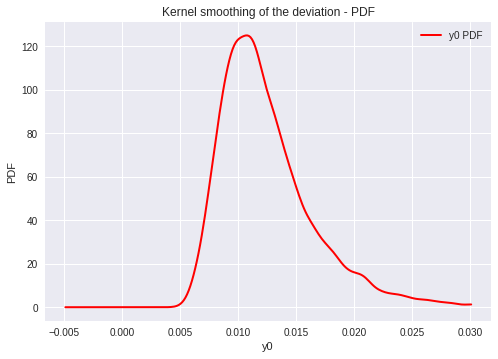

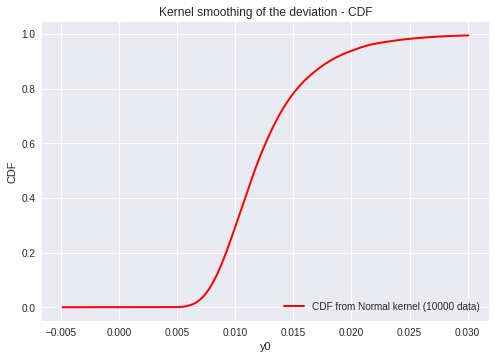

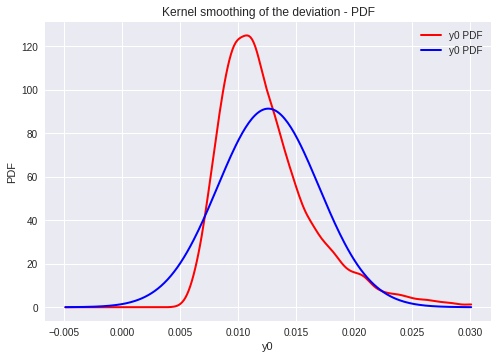

In [0]:
##########################
# Kernel Smoothing Fitting
##########################


print ("##########################")
print ("# Kernel Smoothing Fitting")
print ("##########################")

# We generate a sample of the output variable
size = 10000
output_sample = outputVariableOfInterest.getSample(size)

# We build the kernel smoothing distribution
kernel = KernelSmoothing()
bw = kernel.computeSilvermanBandwidth(output_sample)
smoothed = kernel.build(output_sample, bw)
print ("Sample size = ", size)
print ( "Kernel bandwidth=" , kernel.getBandwidth()[0])

# We draw the pdf and cdf from kernel smoothing
# Evaluate at best the range of the graph
mean_sample = output_sample.computeMean()[0]
standardDeviation_sample = sqrt(output_sample.computeCovariance()[0,0])
xmin = mean_sample - 4*standardDeviation_sample
xmax = mean_sample + 4*standardDeviation_sample

# Draw the PDF
smoothedPDF = smoothed.drawPDF(xmin, xmax, 251)
# Change the title
smoothedPDF.setTitle("Kernel smoothing of the deviation - PDF")
# Change the legend
smoothedPDF_draw = smoothedPDF.getDrawable(0)
title = "PDF from Normal kernel (" + str(size) + " data)"
smoothedPDF_draw.setLegend(title)
#smoothedPDF.setDrawable(smoothedPDF_draw,0)
#smoothedPDF.draw("smoothedPDF", 640, 480)
#View(smoothedPDF).save('smoothedPDF_pdf_R.png')
View(smoothedPDF).show()

# Draw the CDF
smoothedCDF = smoothed.drawCDF(xmin, xmax, 251)
# Change the title
smoothedCDF.setTitle("Kernel smoothing of the deviation - CDF")
# Change the legend
smoothedCDF_draw = smoothedCDF.getDrawable(0)
title = "CDF from Normal kernel (" + str(size) + " data)"
smoothedCDF_draw.setLegend(title)
smoothedCDF.setDrawable(smoothedCDF_draw,0)
# Change the legend position
smoothedCDF.setLegendPosition("bottomright")
#smoothedCDF.draw("smoothedCDF", 640, 480)
View(smoothedCDF).show()

# In order to see the graph whithout creating the associated files
#View(smoothedCDF).show()
#View(smoothedPDF).show()

# Mean of the output variable of interest
print ("Mean from kernel smoothing = ", smoothed.getMean()[0])
print ("")

# Superposition of the kernel smoothing pdf and the gaussian one
# which mean and standard deviation are those of the output_sample
normalDist = NormalFactory().build(output_sample)
normalDistPDF = normalDist.drawPDF(xmin, xmax, 251)
normalDistPDFDrawable = normalDistPDF.getDrawable(0)
normalDistPDFDrawable.setColor('blue')
smoothedPDF.add(normalDistPDFDrawable)
#smoothedPDF.draw("smoothedPDF_and_NormalPDF", 640, 480)

# In order to see the graph whithout creating the associated files
View(smoothedPDF).show()



############################################################
Probabilistic Study : threshold exceedance: deviation <-1cm
############################################################

#####
FORM
#####
('FORM event probability=', 1.2082248223724607e-14)
('Number of evaluations of the limit state function = ', 109)
('Generalized reliability index=', 7.626269196812093)
Standard space design point=
('E', ' = ', -1.5409131748473421)
('F', ' = ', 7.279901787925148)
('L', ' = ', 0.23971584423582645)
('I', ' = ', -1.652614511013801)
Physical space design point=
('E', ' = ', 28440064.34369854)
('F', ' = ', 743.587876661192)
('L', ' = ', 255.94724724447966)
('I', ' = ', 342.37206850889515)
Importance factors=
('E', ' = ', 0.040793454647213054)
('F', ' = ', 0.9105219144530591)
('L', ' = ', 0.000987251106118646)
('I', ' = ', 0.047697379793609176)
('Hasofer reliability index=', 7.626269196812092)



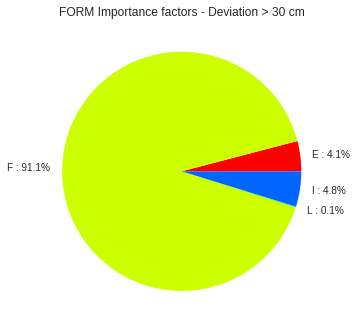

In [0]:
#################################################################
### Probabilistic Study : threshold exceedance: deviation > 30cm
#################################################################

print ("")
print ("############################################################")
print ("Probabilistic Study : threshold exceedance: deviation <-1cm")
print ("############################################################")
print ("")

######
# FORM
######

print ("#####")
print ("FORM")
print ("#####")

# We create an Event from this RandomVector
# threshold has been defined in the kernel smoothing section
threshold = 30
myEvent = Event(outputVariableOfInterest, Greater(), threshold)
myEvent.setName("Deviation > 30 cm")

# We create a NearestPoint algorithm
myCobyla = Cobyla()
myCobyla.setMaximumIterationNumber(1000)
myCobyla.setMaximumAbsoluteError(1.0e-10)
myCobyla.setMaximumRelativeError(1.0e-10)
myCobyla.setMaximumResidualError(1.0e-10)
myCobyla.setMaximumConstraintError(1.0e-10)

# We create a FORM algorithm
# The first parameter is a NearestPointAlgorithm
# The second parameter is an event
# The third parameter is a starting point for the design point research
meanVector = inputRandomVector.getMean()
myAlgoFORM = FORM(myCobyla, myEvent, meanVector)

# Get the number of times the limit state function has been evaluated so far
deviationCallNumberBeforeFORM = deviation.getEvaluationCallsNumber()

# Perform the simulation
myAlgoFORM.run()

# Get the number of times the limit state function has been evaluated so far
deviationCallNumberAfterFORM = deviation.getEvaluationCallsNumber()

# Stream out the result
resultFORM = myAlgoFORM.getResult()
print ( "FORM event probability=" , resultFORM.getEventProbability())
print ("Number of evaluations of the limit state function = ", deviationCallNumberAfterFORM - deviationCallNumberBeforeFORM)
print ( "Generalized reliability index=" , resultFORM.getGeneralisedReliabilityIndex())
print ( "Standard space design point=")
for i in range(inputRandomVector.getDimension()) :
  print (inputDistribution.getDescription()[i], " = ", resultFORM.getStandardSpaceDesignPoint()[i])
print ( "Physical space design point=")
for i in range(inputRandomVector.getDimension()) :
  print (inputDistribution.getDescription()[i], " = ", resultFORM.getPhysicalSpaceDesignPoint()[i])

print ( "Importance factors=")
for i in range(inputRandomVector.getDimension()) :
  print (inputDistribution.getDescription()[i], " = ", resultFORM.getImportanceFactors()[i])

print ( "Hasofer reliability index=" , resultFORM.getHasoferReliabilityIndex())
print ("")

# Graph 1 : Importance Factors graph */
importanceFactorsGraph = resultFORM.drawImportanceFactors()
title = "FORM Importance factors - "+ myEvent.getName()
importanceFactorsGraph.setTitle( title)
#importanceFactorsGraph.draw("ImportanceFactorsDrawingFORM", 640, 480)

# In order to see the graph whithout creating the associated files
View(importanceFactorsGraph).show()

############
Monte Carlo
############

('Number of evaluations of the limit state function = ', 4000000)
('Monte Carlo probability estimation = ', 0.0)
('Variance of the Monte Carlo probability estimator = ', 0.0)
('0.95 Confidence Interval = [', 0.0, ', ', 0.0, ']')



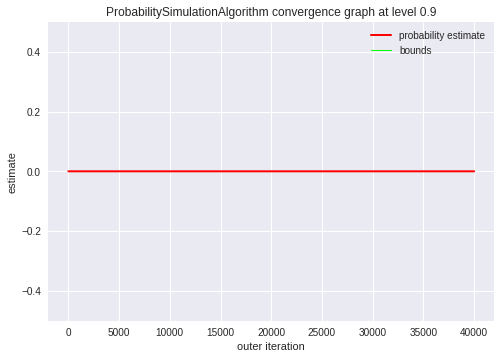

In [0]:
######
# MC
######

print ("############")
print ("Monte Carlo")
print ("############")
print ("")


maximumOuterSampling = 40000
blockSize = 100
coefficientOfVariation = 0.10

# We create a Monte Carlo algorithm
myAlgoMonteCarlo = MonteCarlo(myEvent)
myAlgoMonteCarlo.setMaximumOuterSampling(maximumOuterSampling)
myAlgoMonteCarlo.setBlockSize(blockSize)
myAlgoMonteCarlo.setMaximumCoefficientOfVariation(coefficientOfVariation)

# Define the HistoryStrategy to store the values of the probability estimator
# and the variance estimator
# used ot draw the convergence graph
# Full strategy
myAlgoMonteCarlo.setConvergenceStrategy(Full())

# Perform the simulation
myAlgoMonteCarlo.run()

# Display number of iterations and number of evaluations
# of the limit state function
print ("Number of evaluations of the limit state function = ", myAlgoMonteCarlo.getResult().getOuterSampling()* myAlgoMonteCarlo.getResult().getBlockSize())

# Display the Monte Carlo probability of 'myEvent'
print ("Monte Carlo probability estimation = ", myAlgoMonteCarlo.getResult().getProbabilityEstimate())

# Display the variance of the Monte Carlo probability estimator
print ("Variance of the Monte Carlo probability estimator = ", myAlgoMonteCarlo.getResult().getVarianceEstimate())

# Display the confidence interval length centered around
# the MonteCarlo probability MCProb
# IC = [MCProb - 0.5*length, MCProb + 0.5*length]
# level 0.95

print ("0.95 Confidence Interval = [", myAlgoMonteCarlo.getResult().getProbabilityEstimate() - 0.5*myAlgoMonteCarlo.getResult().getConfidenceLength(0.95), ", ", myAlgoMonteCarlo.getResult().getProbabilityEstimate() + 0.5*myAlgoMonteCarlo.getResult().getConfidenceLength(0.95), "]")
print ("")

# Draw the convergence graph and the confidence intervalle of level alpha
alpha = 0.90
convergenceGraphMonteCarlo = myAlgoMonteCarlo.drawProbabilityConvergence(alpha)
# In order to see the graph whithout creating the associated files
View(convergenceGraphMonteCarlo).show()

# Create the file .EPS
#convergenceGraphMonteCarlo.draw("convergenceGrapheMonteCarlo", 640, 480)
#View(convergenceGraphMonteCarlo).show()


In [0]:


########################
# Directional Sampling
########################

print ("#######################")
print ("Directional Sampling")
print ("#######################")
print (" ")

# Directional sampling from an event (slow and safe strategy by default)

# We create a Directional Sampling algorithm */
myAlgoDirectionalSim = DirectionalSampling(myEvent)
myAlgoDirectionalSim.setMaximumOuterSampling(maximumOuterSampling * blockSize)
myAlgoDirectionalSim.setBlockSize(1)
myAlgoDirectionalSim.setMaximumCoefficientOfVariation(coefficientOfVariation)

# Define the HistoryStrategy to store the values of the probability estimator
# and the variance estimator
# used ot draw the convergence graph
# Full strategy
myAlgoDirectionalSim.setConvergenceStrategy(Full())

# Save the number of calls to the limit state fucntion, its gradient and hessian already done
deviationCallNumberBefore = deviation.getEvaluationCallsNumber()
deviationGradientCallNumberBefore = deviation.getGradientCallsNumber()
deviationHessianCallNumberBefore = deviation.getHessianCallsNumber()

# Perform the simulation */
myAlgoDirectionalSim.run()

# Save the number of calls to the limit state fucntion, its gradient and hessian already done
deviationCallNumberAfter = deviation.getEvaluationCallsNumber()
deviationGradientCallNumberAfter = deviation.getGradientCallsNumber()
deviationHessianCallNumberAfter = deviation.getHessianCallsNumber()

# Display number of iterations and number of evaluations
# of the limit state function
print ("Number of evaluations of the limit state function = ", deviationCallNumberAfter - deviationCallNumberBefore)

# Display the Directional Simumation probability of 'myEvent'
print ("Directional Sampling probability estimation = ", myAlgoDirectionalSim.getResult().getProbabilityEstimate())

# Display the variance of the Directional Simumation probability estimator
print ("Variance of the Directional Sampling probability estimator = ", myAlgoDirectionalSim.getResult().getVarianceEstimate())

# Display the confidence interval length centered around
# the Directional Simumation probability DSProb
# IC = [DSProb - 0.5*length, DSProb + 0.5*length]
# level 0.95
print ("0.95 Confidence Interval = [", myAlgoDirectionalSim.getResult().getProbabilityEstimate() - 0.5*myAlgoDirectionalSim.getResult().getConfidenceLength(0.95), ", ", myAlgoDirectionalSim.getResult().getProbabilityEstimate() + 0.5*myAlgoDirectionalSim.getResult().getConfidenceLength(0.95), "]")
print ("")


# Draw the convergence graph and the confidence intervalle of level alpha
alpha = 0.90
convergenceGraphDS = myAlgoDirectionalSim.drawProbabilityConvergence(alpha)
# In order to see the graph whithout creating the associated files
#View(convergenceGraphDS).show()

# Create the file .EPS
#convergenceGraphDS.draw("convergenceGrapheDS", 640, 480)
View(convergenceGraphDS).show()

In [0]:
#####################
# Importance Sampling
#####################


print ("####################")
print ("Importance Sampling")
print ("####################")
print ("")

maximumOuterSampling = 40000
blockSize = 1
standardSpaceDesignPoint = resultFORM.getStandardSpaceDesignPoint()
mean = standardSpaceDesignPoint
sigma = NumericalPoint(4, 1.0)
importanceDistribution = Normal(mean, sigma, CorrelationMatrix(4))

myStandardEvent = StandardEvent(myEvent)

myAlgoImportanceSampling = ImportanceSampling(myStandardEvent, importanceDistribution)
myAlgoImportanceSampling.setMaximumOuterSampling(maximumOuterSampling)
myAlgoImportanceSampling.setBlockSize(blockSize)
myAlgoImportanceSampling.setMaximumCoefficientOfVariation(coefficientOfVariation)

# Define the HistoryStrategy to store the values of the probability estimator
# and the variance estimator
# used ot draw the convergence graph
# Full strategy
myAlgoImportanceSampling.setConvergenceStrategy(Full())

# Perform the simulation
myAlgoImportanceSampling.run()

# Display number of iterations and number of evaluations
# of the limit state function
print ("Number of evaluations of the limit state function = ", myAlgoImportanceSampling.getResult().getOuterSampling()* myAlgoImportanceSampling.getResult().getBlockSize())

# Display the Importance Sampling probability of 'myEvent'
print ("Importance Sampling probability estimation = ", myAlgoImportanceSampling.getResult().getProbabilityEstimate())

# Display the variance of the Importance Sampling probability estimator
print ("Variance of the Importance Sampling probability estimator = ", myAlgoImportanceSampling.getResult().getVarianceEstimate())

# Display the confidence interval length centered around
# the ImportanceSampling probability ISProb
# IC = [ISProb - 0.5*length, ISProb + 0.5*length]
# level 0.95
print ("0.95 Confidence Interval = [", myAlgoImportanceSampling.getResult().getProbabilityEstimate() - 0.5*myAlgoImportanceSampling.getResult().getConfidenceLength(0.95), ", ", myAlgoImportanceSampling.getResult().getProbabilityEstimate() + 0.5*myAlgoImportanceSampling.getResult().getConfidenceLength(0.95), "]")

# Draw the convergence graph and the confidence intervalle of level alpha
alpha = 0.90
convergenceGraphIS = myAlgoImportanceSampling.drawProbabilityConvergence(alpha)
# In order to see the graph whithout creating the associated files
#View(convergenceGraphIS).show()

# Create the file .EPS
#convergenceGraphIS.draw("convergenceGrapheIS", 640, 480)
View(convergenceGraphIS).show()